In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Create 500 evenly spaced numbers from 0 to 10
# Showing the last 20 values
x = np.linspace(0, 10, 500)
x[-20:]

array([ 9.61923848,  9.63927856,  9.65931864,  9.67935872,  9.6993988 ,
        9.71943888,  9.73947896,  9.75951904,  9.77955912,  9.7995992 ,
        9.81963928,  9.83967936,  9.85971944,  9.87975952,  9.8997996 ,
        9.91983968,  9.93987976,  9.95991984,  9.97995992, 10.        ])

In [4]:
# Get the available styles
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


Text(0.5,1,'Default MatPlotLib')

Text(0.5,0,'x-axis')

Text(0,0.5,'y-axis')

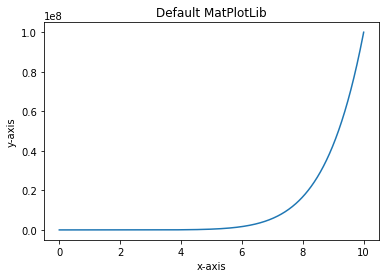

In [5]:
# Plot the default matlplotlib style
plt.title('Default MatPlotLib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, x**8)
plt.show()

Text(0.5,1,'Baysian Methods for Hackers')

Text(0.5,0,'x-axis')

Text(0,0.5,'y-axis')

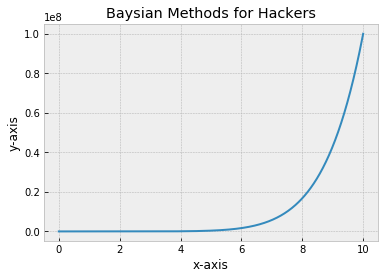

In [6]:
# Plot the default Baysian Methods for Hackers style
plt.style.use('bmh')
plt.title('Baysian Methods for Hackers')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, x**8)
plt.show()

Text(0.5,1,'GGPlot')

Text(0.5,0,'x-axis')

Text(0,0.5,'y-axis')

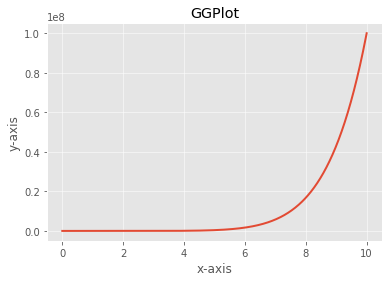

In [7]:
# Plot the GGPlot like style
plt.style.use('ggplot')
plt.title('GGPlot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, x**8)
plt.show()

Text(0.5,1,'Grayscale')

Text(0.5,0,'x-axis')

Text(0,0.5,'y-axis')

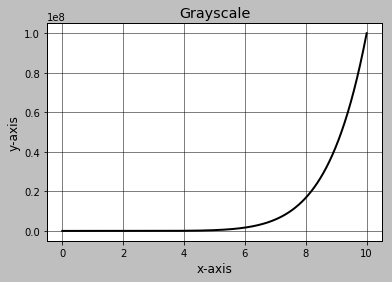

In [8]:
plt.style.use('grayscale')
plt.title('Grayscale')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, x**8)
plt.show()

Text(0.5,1,'Nate Silver fivethirtyeight.com')

Text(0.5,0,'x-axis')

Text(0,0.5,'y-axis')

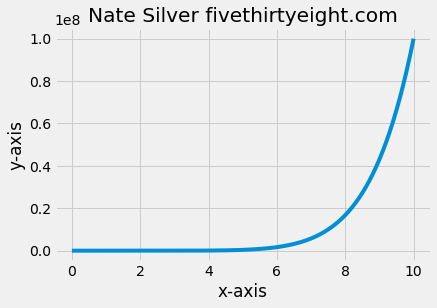

In [9]:
plt.style.use('fivethirtyeight')
plt.title('Nate Silver fivethirtyeight.com')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, x**8)
plt.show()

Text(0.5,1,'Dark Background')

Text(0.5,0,'x-axis')

Text(0,0.5,'y-axis')

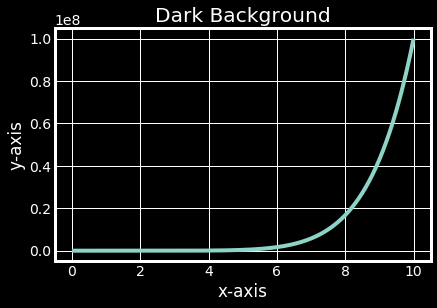

In [10]:
plt.style.use('dark_background')
plt.title('Dark Background')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, x**8)
plt.show()

# barplots 
Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the plot method with a kind='bar' argument.

For this series of examples, let's load up the Titanic dataset:

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


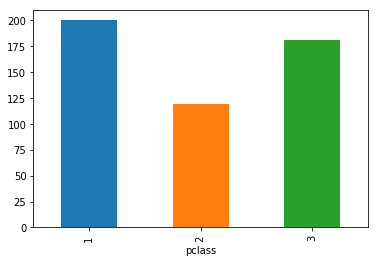

In [4]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

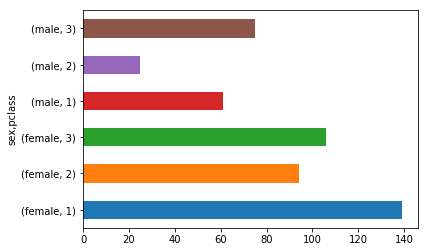

In [5]:
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh')

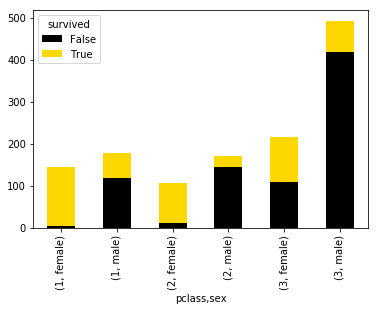

In [6]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Another way of comparing the groups is to look at the survival rate, by adjusting for the number of people in each group.

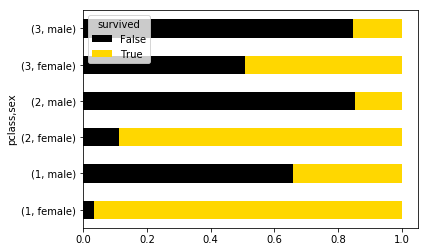

In [7]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

# histograms
Frequenfly it is useful to look at the distribution of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

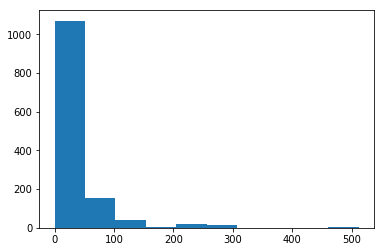

In [8]:
titanic.fare.hist(grid=False)

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

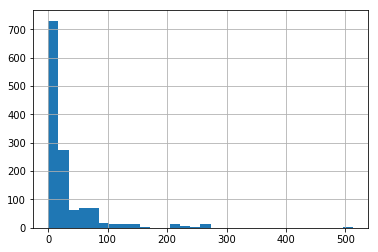

In [9]:
titanic.fare.hist(bins=30)

There are algorithms for determining an "optimal" number of bins, each of which varies somehow with the number of observations in the data series.

In [10]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

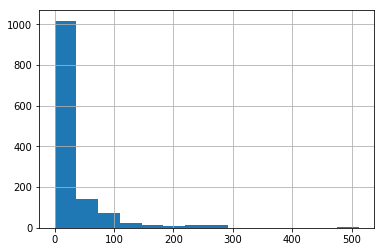

In [11]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

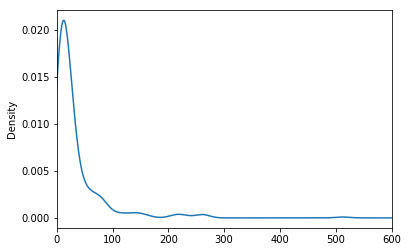

In [12]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))

Often, histograms and density plots are shown together:

C:\Users\emyhr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


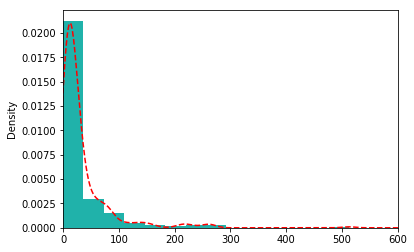

In [14]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')

Here, we had to normalize the histogram (normed=True), since the kernel density is normalized by definition (it is a probability distribution).

We will explore kernel density estimates more in the next section.

## Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

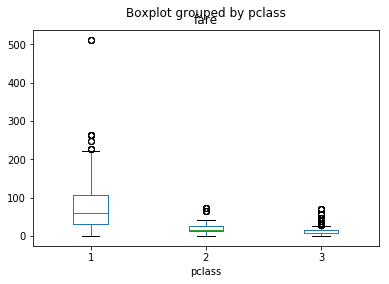

In [15]:
titanic.boxplot(column='fare', by='pclass', grid=False)

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

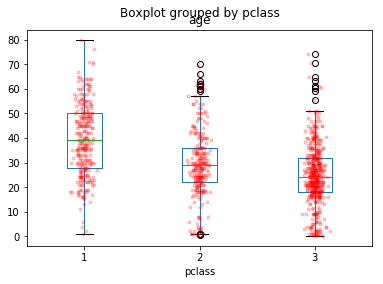

In [17]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)

When data are dense, a couple of tricks used above help the visualization:

1. reducing the alpha level to make the points partially transparent
2. adding random "jitter" along the x-axis to avoid overstriking

A related but inferior ugly stepsister of the box plot is the so-called dynamite plot, which is just a bar chart with half of an error bar.

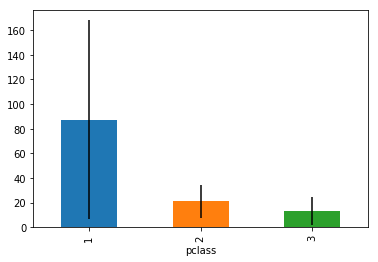

In [18]:
titanic.groupby('pclass')['fare'].mean().plot(kind='bar', yerr=titanic.groupby('pclass')['fare'].std())

How much does this plot suck?

- bar charts should be used for measurable quantities (*e.g.* raw data), not estimates. The area of the bar does not represent anything, since these are estimates derived from the data.
- the "data-ink ratio" (*sensu* Edward Tufte) is very high. There are only 6 values represented here (3 means and 3 standard deviations).
- the plot hides the underlying data.

A boxplot is **always** a better choice than a dynamite plot.

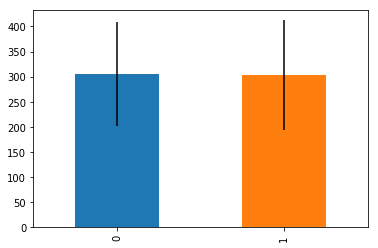

In [20]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [225, 380]

fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)

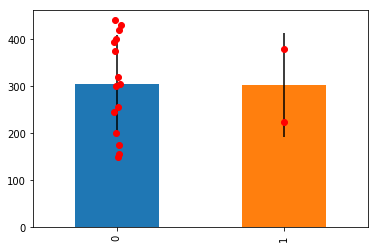

In [21]:
fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)
x1, x2 = p.xaxis.get_majorticklocs()
plt.plot(np.random.normal(x1, 0.01, size=len(data1)), data1, 'ro')
plt.plot([x2]*len(data2), data2, 'ro')

## Scatterplots
Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are no scatterplot methods for Series or DataFrame objects; we must instead use the matplotlib function `scatter`.

To look at how Pandas does scatterplots, let's reload the baseball sample dataset.

In [22]:
baseball = pd.read_csv("data/baseball.csv")
baseball.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


(0, 700)

(0, 200)

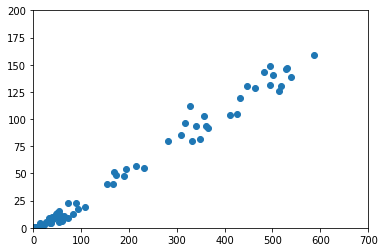

In [23]:
plt.scatter(baseball.ab, baseball.h)
plt.xlim(0, 700); plt.ylim(0, 200)

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

(0, 700)

(0, 200)

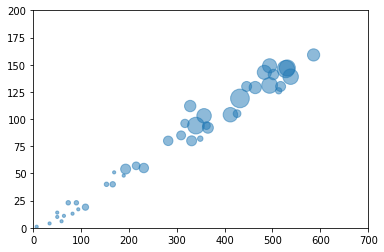

In [24]:
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0, 700); plt.ylim(0, 200)

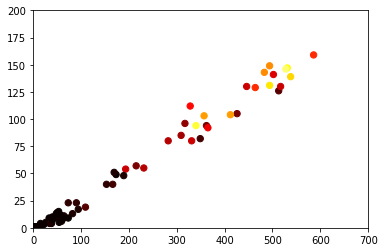

In [25]:
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
plt.xlim(0, 700); plt.ylim(0, 200);

To view scatterplots of a large numbers of variables simultaneously, we can use the scatter_matrix function that was recently added to Pandas. It generates a matrix of pair-wise scatterplots, optiorally with histograms or kernel density estimates on the diagonal.

C:\Users\emyhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


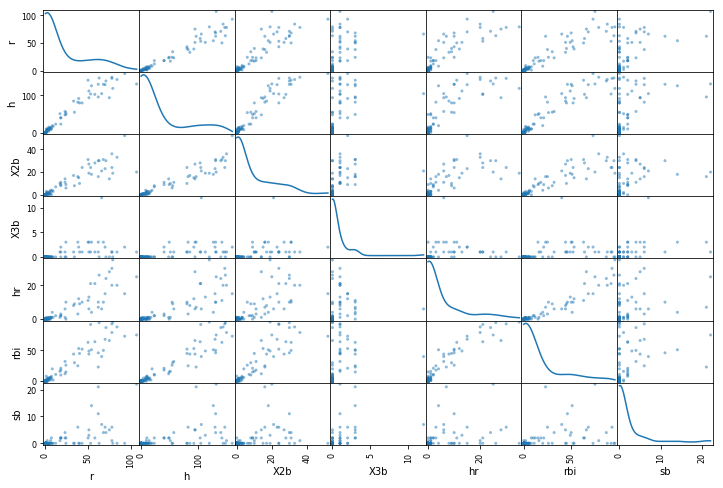

In [26]:
_ = pd.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,8), diagonal='kde')

## Trellis Plots

One of the reasons why people claim to like R for carrying out statistical analyses is the quality of its graphics. In particular, the addition of [Hadley Wickham's ggplot2 package](http://ggplot2.org) allows for flexible yet user-friendly generation of publication-quality plots. Its srength is based on its implementation of a powerful model of graphics, called the [Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.pdf) (GofG). The GofG is essentially a theory of scientific graphics that allows the components of a graphic to be completely described. ggplot2 uses this description to build the graphic component-wise, by adding various layers.

Pandas recently added functions for generating graphics using a GofG approach. Chiefly, this allows for the easy creation of **trellis plots**, which are a faceted graphic that shows relationships between two variables, conditioned on particular values of other variables. This allows for the representation of more than two dimensions of information without having to resort to 3-D graphics, etc.

Let's use the `titanic` dataset to create a trellis plot that represents 4 variables at a time. This consists of 4 steps:

1. Create a `RPlot` object that merely relates two variables in the dataset
2. Add a grid that will be used to condition the variables by both passenger class and sex
3. Add the actual plot that will be used to visualize each comparison
4. Draw the visualization